### In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class.
#### Hint:
#### import numpy as np
#### import matplotlib.pyplot as plt
#### from mpl_toolkits.mplot3d import Axes3D
#### from sklearn import decomposition
#### from sklearn import datasets

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [21]:
data = load_iris()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
# splitting data into X and y
X = df.iloc[:,:].values
y = df.iloc[:,4].values

In [23]:
# Apply Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Apply LabelEncoder for output (target)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [25]:
# Transforming Dimensions
pca = PCA(n_components=3)
X = pca.fit_transform(X)

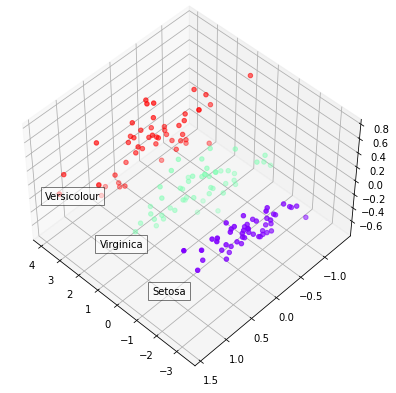

In [48]:
fig = plt.figure(1, figsize=(10, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
for name, label in [('Setosa', 0), ('Virginica', 1), ('Versicolour', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='k', facecolor='w'))
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
              cmap=plt.cm.rainbow)
plt.show()